In [1]:
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [3]:
train = pd.read_csv('./datasets/Morosidad_Train.csv')
test = pd.read_csv('./datasets/Morosidad_Test.csv')

In [4]:
train.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.0,6.0,3230.0,192.0,2,3.0,2,1
1,2211,32.0,185.0,7.0,2930.0,217.0,2,1.0,5,1
2,2212,28.0,NaN,7.0,1883.7,202.0,2,1.0,2,1
3,2216,56.0,200.0,0.0,850.0,194.0,2,1.0,5,1
4,2218,32.0,131.0,65.0,3200.0,200.0,2,1.0,2,1


In [5]:
train.columns

Index(['ID', 'edad', 'meses', 'max_ant', 'ingreso', 'score', 'tipo_vivienda',
       'zona', 'nivel', 'riesgo'],
      dtype='object')

In [7]:
train.describe()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
count,4500.000000,4487.000000,4494.000000,4496.000000,4495.000000,4495.000000,4500.000000,4494.000000,4500.000000,4500.000000
mean,2627.922889,36.714286,183.848687,26.925044,4497.296921,197.564182,2.583333,1.754117,3.162222,0.700000
std,1442.292454,9.834472,73.091668,32.693016,5465.461575,19.291196,0.922388,1.246522,1.475259,0.458308
min,2.000000,20.000000,95.000000,0.000000,123.700000,134.000000,1.000000,1.000000,1.000000,0.000000
25%,1275.750000,29.000000,137.000000,0.000000,1406.415000,183.000000,2.000000,1.000000,2.000000,0.000000
50%,2749.500000,35.000000,161.000000,14.000000,2500.000000,197.000000,2.000000,1.000000,2.000000,1.000000
75%,3874.250000,43.000000,207.000000,42.000000,5000.000000,213.000000,4.000000,3.000000,5.000000,1.000000
max,4999.000000,85.000000,678.000000,130.000000,30000.000000,266.000000,4.000000,5.000000,5.000000,1.000000


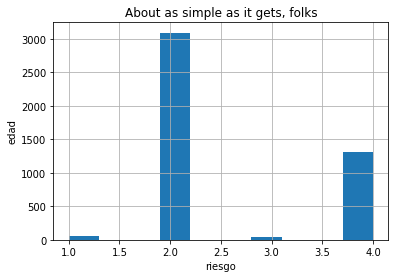

In [21]:
import matplotlib.pyplot as plt
plt.hist(train['tipo_vivienda'])
plt.xlabel('riesgo')
plt.ylabel('edad')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.show()

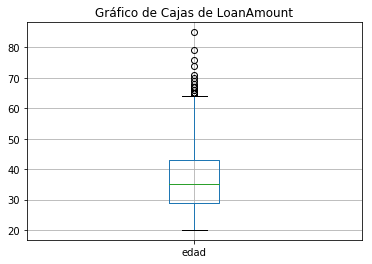

In [23]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de LoanAmount')
#train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
train.boxplot(column='edad')

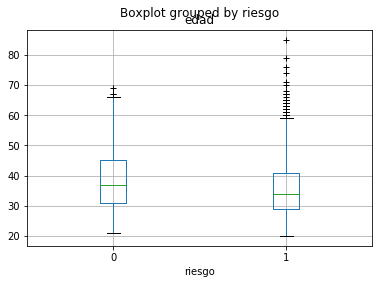

In [24]:
train.boxplot(column='edad',showfliers='T',notch=0, sym='+', vert=1, whis=1.5,by='riesgo')

In [26]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
ID                0
edad             13
meses             6
max_ant           4
ingreso           5
score             5
tipo_vivienda     0
zona              6
nivel             0
riesgo            0
dtype: int64


In [28]:
# Viendo las variables por tipo de datos
tipos = train.columns.to_series().groupby(train.dtypes).groups
tipos

{dtype('int64'): Index(['ID', 'tipo_vivienda', 'nivel', 'riesgo'], dtype='object'),
 dtype('float64'): Index(['edad', 'meses', 'max_ant', 'ingreso', 'score', 'zona'], dtype='object')}

In [31]:
train_parametrica = train.copy()
# Imputación meiante ML
# Imputación mediante XGBoost
#from xgboost import XGBClassifier
#for column in ['ID', 'edad', 'meses', 'max_ant', 'ingreso', 'score', 'tipo_vivienda', 'zona', 'nivel', 'riesgo']:
#    df_input = train_no_parametrica[train_no_parametrica[column].notnull()]
#    xgb = XGBClassifier()
#    xgb.fit(df_input.drop(column, axis=1), df_input[column])
#    y_pred = xgb.predict(train_no_parametrica.drop(column, axis=1))
#    nulls = train_no_parametrica[train_no_parametrica[column].isnull()]
#    for ni in nulls.index:
#        train_no_parametrica.loc[ni, column] = y_pred[ni]

In [33]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['score', 'zona']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['edad', 'meses', 'max_ant', 'ingreso']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())  

In [34]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
ID               0
edad             0
meses            0
max_ant          0
ingreso          0
score            0
tipo_vivienda    0
zona             0
nivel            0
riesgo           0
dtype: int64


In [36]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [38]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
ID               0
edad             0
meses            0
max_ant          0
ingreso          0
score            0
tipo_vivienda    0
zona             0
nivel            0
dtype: int64


In [40]:
train_parametrica = train_parametrica.drop('ID', axis=1)

KeyError: "labels ['ID'] not contained in axis"

In [42]:
train_parametrica.head()

,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,33.0,128.0,6.0,3230.0,192.0,2,3.0,2,1
1,32.0,185.0,7.0,2930.0,217.0,2,1.0,5,1
2,28.0,161.0,7.0,1883.7,202.0,2,1.0,2,1
3,56.0,200.0,0.0,850.0,194.0,2,1.0,5,1
4,32.0,131.0,65.0,3200.0,200.0,2,1.0,2,1


In [55]:
#Creamos nuevas variables a partir de cortes que obtenemos del árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
feature_cols = ['riesgo']
X_train=train_parametrica[feature_cols] # Ponemos la variable independiente o feature para poder ver cortes.
Y_train=train_parametrica[['edad', 'meses']] # Ponemos la variable dependiente.
treeclf = DecisionTreeClassifier(max_depth=1, random_state=1) # Acá definimos los parámetros del árbol
treeclf.fit(X_train, Y_train)  # Ajusto un algoritmo sobre unas covariables y una vd
export_graphviz(treeclf, out_file='Recod_ApplicantIncome02.dot', feature_names=feature_cols)